In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Initialize the data used for gradient descent analysis

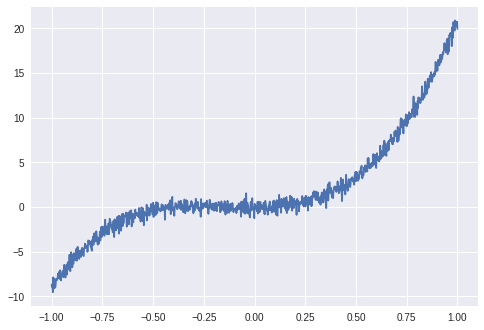

In [0]:
# Uniformaly choose 5000 numbers from -100 to 100
N = 1000
x = np.linspace(-1,1,N)
noise = np.random.normal(0,0.5,N)
y = 6*(x**2) + 15*(x**3) + noise
dat = np.vstack((x,y))
plt.plot(x,y)
plt.show()

n = 100
theta_1 = np.linspace(0,12,n)
theta_2 = np.linspace(0,30,n)
l = lambda t1,t2: sum((y-t1*(x**2)-t2*(x**3))**2)/N
cost = np.array([l(a,b) for a in theta_1 for b in theta_2]).reshape(n,n)

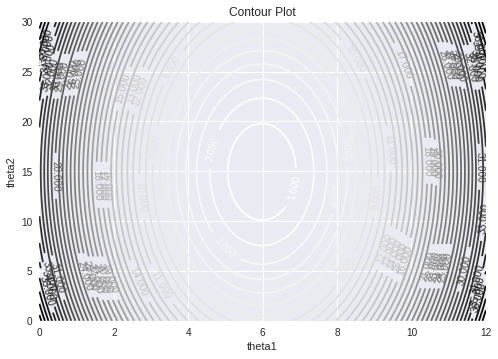

In [0]:
# Contour plot for the loss function
CS = plt.contour(theta_1,theta_2,cost,levels=range(40))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()

**1. Batch Gradient Descent**

Batch Gradient Descent usually uses all the training data we have to do the optimization process, which is usually known as Vanilla Gradient Descent. Batch Gradient Descent converges straightly in the direction of the first gradient of the cost function. Though here the example data is just generated from a very simple function, in current machine learning or deep learning world, the data (especially) the image data would be very large scaled and messy with very high dimensionality. It would be impossible to use all the data example in each step of the training process, especially that the gradient dscent might easily trapped in the saddle point. That would be a very downside of this algorithm.

In [0]:
# Use the L2 norm as the loss function with two parameters
def f(dat,theta):
  N = dat.shape[1]
  x = dat[0,:]
  y = dat[1,:]
  loss = sum((y-theta[0]*(x**2)-theta[1]*(x**3))**2)/N
  grads = np.array([sum(-2*(x**2)*(y-theta[0]*(x**2)-theta[1]*(x**3)))/N,\
                    sum(-2*(x**3)*(y-theta[0]*(x**2)-theta[1]*(x**3)))/N])
  return loss,grads

# Initialize the parameters and the list to record the training process
theta = np.array([0,0])
learn_rate = 1 
loss = []
gradients = []
thetas = []
thetas.append(theta)

# The training loop with 50 epochs
for i in range(50):
  l,grad = f(dat,theta)
  loss.append(l)
  gradients.append(grad)
  
  # Update the parameters
  theta = theta - grad*learn_rate
  thetas.append(theta)
  print("In epoch %d, the loss is %f, grads are %f and %f， thetas are %f and %f" %(i+1,l,grad[0],grad[1],theta[0],theta[1]))

In epoch 1, the loss is 39.542346, grads are -2.401509 and -4.297094， thetas are 2.401509 and 4.297094
In epoch 2, the loss is 19.121879, grads are -1.437057 and -3.061969， thetas are 3.838565 and 7.359063
In epoch 3, the loss is 9.443209, grads are -0.859931 and -2.181859， thetas are 4.698496 and 9.540922
In epoch 4, the loss is 4.775869, grads are -0.514580 and -1.554722， thetas are 5.213076 and 11.095644
In epoch 5, the loss is 2.494472, grads are -0.307923 and -1.107844， thetas are 5.521000 and 12.203488
In epoch 6, the loss is 1.367761, grads are -0.184261 and -0.789414， thetas are 5.705261 and 12.992902
In epoch 7, the loss is 0.807013, grads are -0.110261 and -0.562510， thetas are 5.815522 and 13.555413
In epoch 8, the loss is 0.526353, grads are -0.065980 and -0.400827， thetas are 5.881501 and 13.956239
In epoch 9, the loss is 0.385302, grads are -0.039482 and -0.285616， thetas are 5.920984 and 14.241855
In epoch 10, the loss is 0.314203, grads are -0.023626 and -0.203521， thet

**2. Stochastic Gradient Descent**

Stochastic Gradient Descent is a kind of lazy algorithm. Before discussing what it is, one intuitive idea of why Neural Networks would not be that easy to overfit is that the neural network constructions using stochastic gradient descent would easily stopped at some local minimum easily but not trying all it can to reach the global minimum of the training dataset. That gives us a naturally early stop without overfitting too much. Stochastic Gradient Descent uses only a small random sample of trainig data to update the parameters in each step, which would be fast computing. However, such a process introduces randomness/noise in each step, which would make the convergence more unstable and variant. 

In [0]:
# Initialize the parameters, learning rate
# Store the loss and gradients for each epoch
theta_SGD = np.array([0,0])
learn_rate_SGD = 1
loss_SGD = []
gradients_SGD = []
thetas_SGD = []
thetas_SGD.append(theta_SGD)

# 50 epochs of training process
for i in range(50):
  Index = np.array(range(N))
  
  # Shuffle the data and randomly sample 100 as a smaller training example
  np.random.shuffle(Index)
  idx = np.random.choice(Index,100)
  dat_choose = dat[:,idx]
  l,grad_SGD = f(dat_choose,theta_SGD)
  loss_SGD.append(l)
  gradients_SGD.append(grad_SGD)
  
  # Update the parameters every time training a small example
  theta_SGD = theta_SGD - grad_SGD*learn_rate_SGD
  thetas_SGD.append(theta_SGD)
  print("In epoch %d, the loss is %f, grads are %f and %f,\
  thetas are %f and %f" %(i+1,l,grad_SGD[0],grad_SGD[1],theta_SGD[0],theta_SGD[1]))

In epoch 1, the loss is 42.204343, grads are -1.742696 and -5.012391,  thetas are 1.742696 and 5.012391
In epoch 2, the loss is 16.034216, grads are -1.835624 and -2.389418,  thetas are 3.578320 and 7.401809
In epoch 3, the loss is 8.031309, grads are -0.266771 and -1.989045,  thetas are 3.845091 and 9.390854
In epoch 4, the loss is 6.402696, grads are -0.738988 and -1.930530,  thetas are 4.584079 and 11.321384
In epoch 5, the loss is 3.076313, grads are -0.743506 and -1.255162,  thetas are 5.327585 and 12.576546
In epoch 6, the loss is 0.911754, grads are -0.003628 and -0.566567,  thetas are 5.331213 and 13.143114
In epoch 7, the loss is 1.009525, grads are -0.448265 and -0.563159,  thetas are 5.779478 and 13.706273
In epoch 8, the loss is 0.455397, grads are -0.105109 and -0.338735,  thetas are 5.884587 and 14.045008
In epoch 9, the loss is 0.373344, grads are -0.058259 and -0.274096,  thetas are 5.942845 and 14.319104
In epoch 10, the loss is 0.328633, grads are -0.054669 and -0.187

**3. Mini-Batch Gradient Descent**

Mini-Batch Gradient Descent calculate the averaged gradients of all small examples to update the parameters in each step. It is designed to reduce the variance of the Stochastic Gradient Descent and maintian the accuracy of the Batch Gradient Descent.

In [0]:
# Initialize the parameters, learning rate
# Store the loss and gradients for each epoch
theta_MGD = np.array([0,0])
learn_rate_MGD = 1
loss_MGD = []
gradients_MGD = []
thetas_MGD = []
thetas_MGD.append(theta_MGD)

# 50 epochs of training process
idx = np.linspace(0,1000,11,dtype='int')
for i in range(50):
  
  # Shuffle the training data and seperate them into several small examples
  np.random.shuffle(Index)
  dat = dat[:,Index]
  dtheta = np.zeros(2)
  
  # Calculae the gradients for each small example and calculate the averaged gradients
  for j in range(10):
    _,d = f(dat[:,range(idx[j],idx[j+1])],theta_MGD)
    dtheta = dtheta + d
  grad_MGD = dtheta/10
  
  # Update the parameters
  theta_MGD = theta_MGD - grad_MGD*learn_rate_MGD
  l,_ = f(dat,theta_MGD)
  loss_MGD.append(l)
  gradients_MGD.append(grad_MGD)
  thetas_MGD.append(theta_MGD)
  print("In epoch %d, the loss is %f, grads are %f and %f,\
  thetas are %f and %f" %(i+1,l,grad_MGD[0],grad_MGD[1],theta_MGD[0],theta_MGD[1]))

In epoch 1, the loss is 19.121879, grads are -2.401509 and -4.297094,  thetas are 2.401509 and 4.297094
In epoch 2, the loss is 9.443209, grads are -1.437057 and -3.061969,  thetas are 3.838565 and 7.359063
In epoch 3, the loss is 4.775869, grads are -0.859931 and -2.181859,  thetas are 4.698496 and 9.540922
In epoch 4, the loss is 2.494472, grads are -0.514580 and -1.554722,  thetas are 5.213076 and 11.095644
In epoch 5, the loss is 1.367761, grads are -0.307923 and -1.107844,  thetas are 5.521000 and 12.203488
In epoch 6, the loss is 0.807013, grads are -0.184261 and -0.789414,  thetas are 5.705261 and 12.992902
In epoch 7, the loss is 0.526353, grads are -0.110261 and -0.562510,  thetas are 5.815522 and 13.555413
In epoch 8, the loss is 0.385302, grads are -0.065980 and -0.400827,  thetas are 5.881501 and 13.956239
In epoch 9, the loss is 0.314203, grads are -0.039482 and -0.285616,  thetas are 5.920984 and 14.241855
In epoch 10, the loss is 0.278289, grads are -0.023626 and -0.2035

**Using Contour Plots to visualize the Gradient paths of three algorithms**

We could clearly see the variance during the Stochastic Gradient Descent.

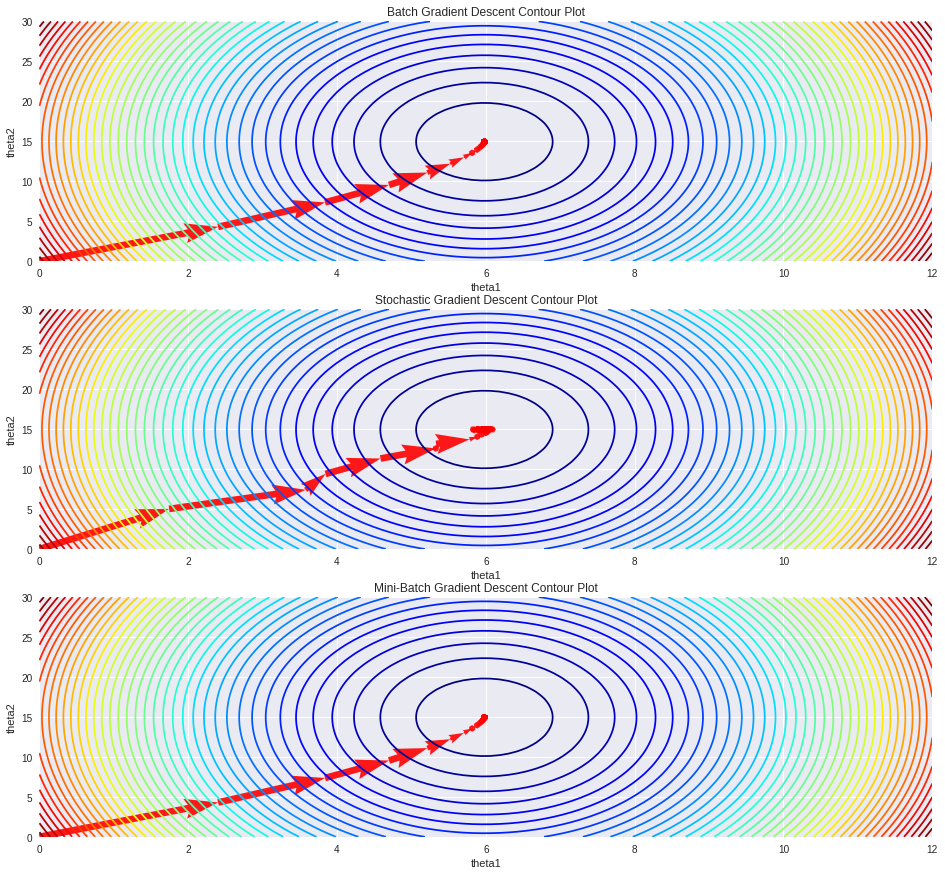

In [0]:
# Contour Path for these three Gradient Descent methods
fig = plt.figure(figsize = (16,15))

# Batch Gradient Descent
ax = fig.add_subplot(3, 1, 1)
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_title('Batch Gradient Descent Contour Plot')
theta_GD_0 = [a[0] for a in thetas]
theta_GD_1 = [a[1] for a in thetas]

anglesx_GD = np.array(theta_GD_0)[1:] - np.array(theta_GD_0)[:-1]
anglesy_GD = np.array(theta_GD_1)[1:] - np.array(theta_GD_1)[:-1]
ax.contour(theta_1,theta_2,cost,levels=range(40), cmap = 'jet')
ax.quiver(theta_GD_0[:-1], theta_GD_1[:-1], anglesx_GD, anglesy_GD, scale_units \
          = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

# Stochastic Gradient Descent
ax = fig.add_subplot(3, 1, 2)
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_title('Stochastic Gradient Descent Contour Plot')
theta_SGD_0 = [a[0] for a in thetas_SGD]
theta_SGD_1 = [a[1] for a in thetas_SGD]

anglesx_SGD = np.array(theta_SGD_0)[1:] - np.array(theta_SGD_0)[:-1]
anglesy_SGD = np.array(theta_SGD_1)[1:] - np.array(theta_SGD_1)[:-1]
ax.contour(theta_1,theta_2,cost,levels=range(40), cmap = 'jet')
ax.quiver(theta_SGD_0[:-1], theta_SGD_1[:-1], anglesx_SGD, anglesy_SGD, scale_units \
          = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

# MINI-BATCH Gradient Descent
ax = fig.add_subplot(3, 1, 3)
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_title('Mini-Batch Gradient Descent Contour Plot')
theta_MGD_0 = [a[0] for a in thetas_MGD]
theta_MGD_1 = [a[1] for a in thetas_MGD]

anglesx_MGD = np.array(theta_MGD_0)[1:] - np.array(theta_MGD_0)[:-1]
anglesy_MGD = np.array(theta_MGD_1)[1:] - np.array(theta_MGD_1)[:-1]
ax.contour(theta_1,theta_2,cost,levels=range(40), cmap = 'jet')
ax.quiver(theta_MGD_0[:-1], theta_MGD_1[:-1], anglesx_MGD, anglesy_MGD, scale_units \
          = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()

**Compare the Gradient Descent with and without the Momentum**

The momentum is from the physics. The idea is that when the gradients are trapped into a zero zone, there could still be some remaining velocity that help it escape. The advanced design of Gradient Descent contains the Momentum and an adaptive learning rate. "Adam" is a widely used in the machine learning and deep learning field now. 

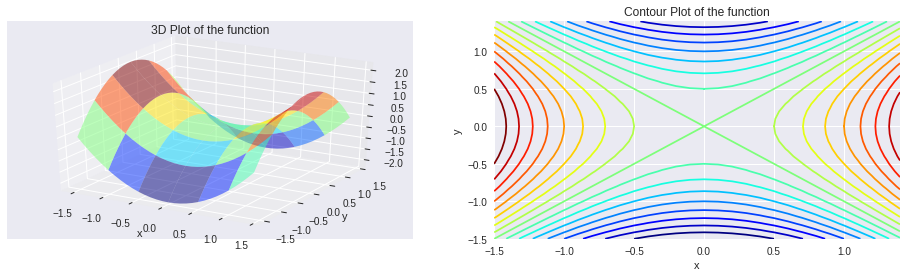

In [0]:
# The Gradient Descent and Momentum
# Initiate a new function with saddle points
x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)
x,y = np.meshgrid(x,y)
fun = x**2 - y**2
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('3D Plot of the function')
ax.plot_surface(x, y, fun, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax = fig.add_subplot(1,2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour Plot of the function')
ax.contour(x,y,fun,20,cmap='jet')
plt.show()

In [0]:
# Gradient Decsent
def f(theta):
  cost = theta[0]**2 - theta[1]**2
  grads = np.array([2*theta[0],-2*theta[1]])
  return cost,grads

theta = np.array([-0.5,0])
learn_rate = 0.1
cost = []
thetas = []
thetas.append(theta)
for i in range(10):
  c,grad = f(theta)
  cost.append(l)
  theta = theta - grad*learn_rate
  thetas.append(theta)
  print("In epoch %d, the loss is %f, grads are %f and %f， thetas are %f and %f" %(i+1,c,grad[0],grad[1],theta[0],theta[1]))
  

In epoch 1, the loss is 0.250000, grads are -1.000000 and -0.000000， thetas are -0.400000 and 0.000000
In epoch 2, the loss is 0.160000, grads are -0.800000 and -0.000000， thetas are -0.320000 and 0.000000
In epoch 3, the loss is 0.102400, grads are -0.640000 and -0.000000， thetas are -0.256000 and 0.000000
In epoch 4, the loss is 0.065536, grads are -0.512000 and -0.000000， thetas are -0.204800 and 0.000000
In epoch 5, the loss is 0.041943, grads are -0.409600 and -0.000000， thetas are -0.163840 and 0.000000
In epoch 6, the loss is 0.026844, grads are -0.327680 and -0.000000， thetas are -0.131072 and 0.000000
In epoch 7, the loss is 0.017180, grads are -0.262144 and -0.000000， thetas are -0.104858 and 0.000000
In epoch 8, the loss is 0.010995, grads are -0.209715 and -0.000000， thetas are -0.083886 and 0.000000
In epoch 9, the loss is 0.007037, grads are -0.167772 and -0.000000， thetas are -0.067109 and 0.000000
In epoch 10, the loss is 0.004504, grads are -0.134218 and -0.000000， the

In [0]:
# Gradient Decsent with Momentum
theta_m = np.array([-0.5,0])
learn_rate = 0.1
gamma = 0.9
v = np.array([0.01,0.01])
cost_m = []
thetas_m = []
thetas_m.append(theta_m)

for i in range(10):
  c,grad = f(theta_m)
  cost_m.append(l)
  
  # Update the velocity first and then use it to update the parameter
  v = gamma*v - learn_rate*grad
  theta_m = theta_m + v
  thetas_m.append(theta_m)
  print("In epoch %d, the loss is %f, velocities are %f and %f， thetas are %f and %f" %(i+1,c,v[0],v[1],theta_m[0],theta_m[1]))

In epoch 1, the loss is 0.250000, velocities are 0.109000 and 0.009000， thetas are -0.391000 and 0.009000
In epoch 2, the loss is 0.152800, velocities are 0.176300 and 0.009900， thetas are -0.214700 and 0.018900
In epoch 3, the loss is 0.045739, velocities are 0.201610 and 0.012690， thetas are -0.013090 and 0.031590
In epoch 4, the loss is -0.000827, velocities are 0.184067 and 0.017739， thetas are 0.170977 and 0.049329
In epoch 5, the loss is 0.026800, velocities are 0.131465 and 0.025831， thetas are 0.302442 and 0.075160
In epoch 6, the loss is 0.085822, velocities are 0.057830 and 0.038280， thetas are 0.360272 and 0.113440
In epoch 7, the loss is 0.116927, velocities are -0.020007 and 0.057140， thetas are 0.340265 and 0.170579
In epoch 8, the loss is 0.086683, velocities are -0.086060 and 0.085542， thetas are 0.254205 and 0.256121
In epoch 9, the loss is -0.000978, velocities are -0.128295 and 0.128212， thetas are 0.125910 and 0.384333
In epoch 10, the loss is -0.131858, velocities 

**The 3D plots and the contour plots of the Gradients' path**

According to the design of this function, if we choose the initial point that straightly direct to the saddle point, the gradient descent would be just trapped there and with a certainty that it could not escape. However, with momentum, it doesn't stay with any thoughts and goes to pursue the direction to the minimum (though there is no global or local min for this function).

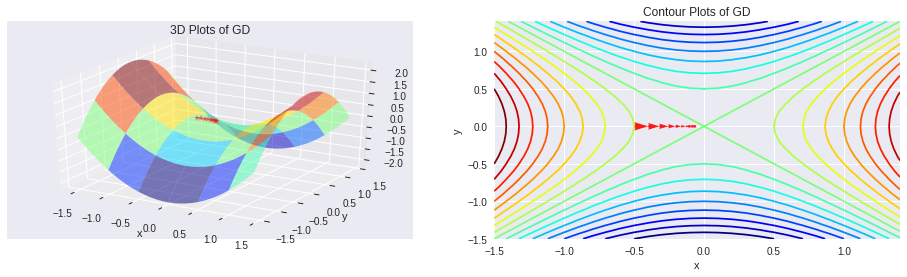

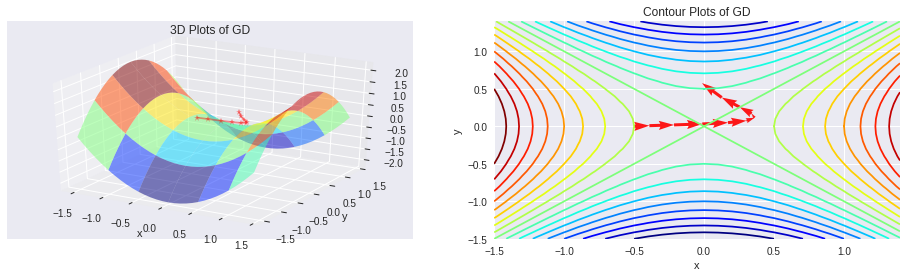

In [0]:
# 2D and 3D Plots
# The gradient descent 3d plot
theta_GD_0 = [a[0] for a in thetas]
theta_GD_1 = [a[1] for a in thetas]
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('3D Plots of GD')

ax.plot_surface(x, y, fun, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_GD_0[1:],theta_GD_1[1:],cost, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

# The gradient descent contour plot
ax = fig.add_subplot(1,2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour Plots of GD')

anglesx_GD = np.array(theta_GD_0)[1:] - np.array(theta_GD_0)[:-1]
anglesy_GD = np.array(theta_GD_1)[1:] - np.array(theta_GD_1)[:-1]
ax.contour(x, y, fun,20, cmap = 'jet')
ax.quiver(theta_GD_0[:-1], theta_GD_1[:-1], anglesx_GD, anglesy_GD, scale_units \
          = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

# The gradient descent with momentum 3d plot
theta_M_0 = [a[0] for a in thetas_m]
theta_M_1 = [a[1] for a in thetas_m]
fig = plt.figure(figsize = (16,4))
ax = fig.add_subplot(1,2,1, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('3D Plots of GD')
ax.plot_surface(x, y, fun, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_M_0[1:],theta_M_1[1:],cost_m, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

# The gradient descent with momentum contour plot
ax = fig.add_subplot(1,2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour Plots of GD')

anglesx_M = np.array(theta_M_0)[1:] - np.array(theta_M_0)[:-1]
anglesy_M = np.array(theta_M_1)[1:] - np.array(theta_M_1)[:-1]
ax.contour(x, y, fun,20, cmap = 'jet')
ax.quiver(theta_M_0[:-1], theta_M_1[:-1], anglesx_M, anglesy_M, scale_units \
          = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
plt.show()